In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

In [3]:
df=pd.read_csv("/content/sample_data/CaliforniaHousing.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [5]:
unique_categories = df['ocean_proximity'].unique()

print(unique_categories)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [7]:
label_encoder = LabelEncoder()


df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  ocean

In [8]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  ocean

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


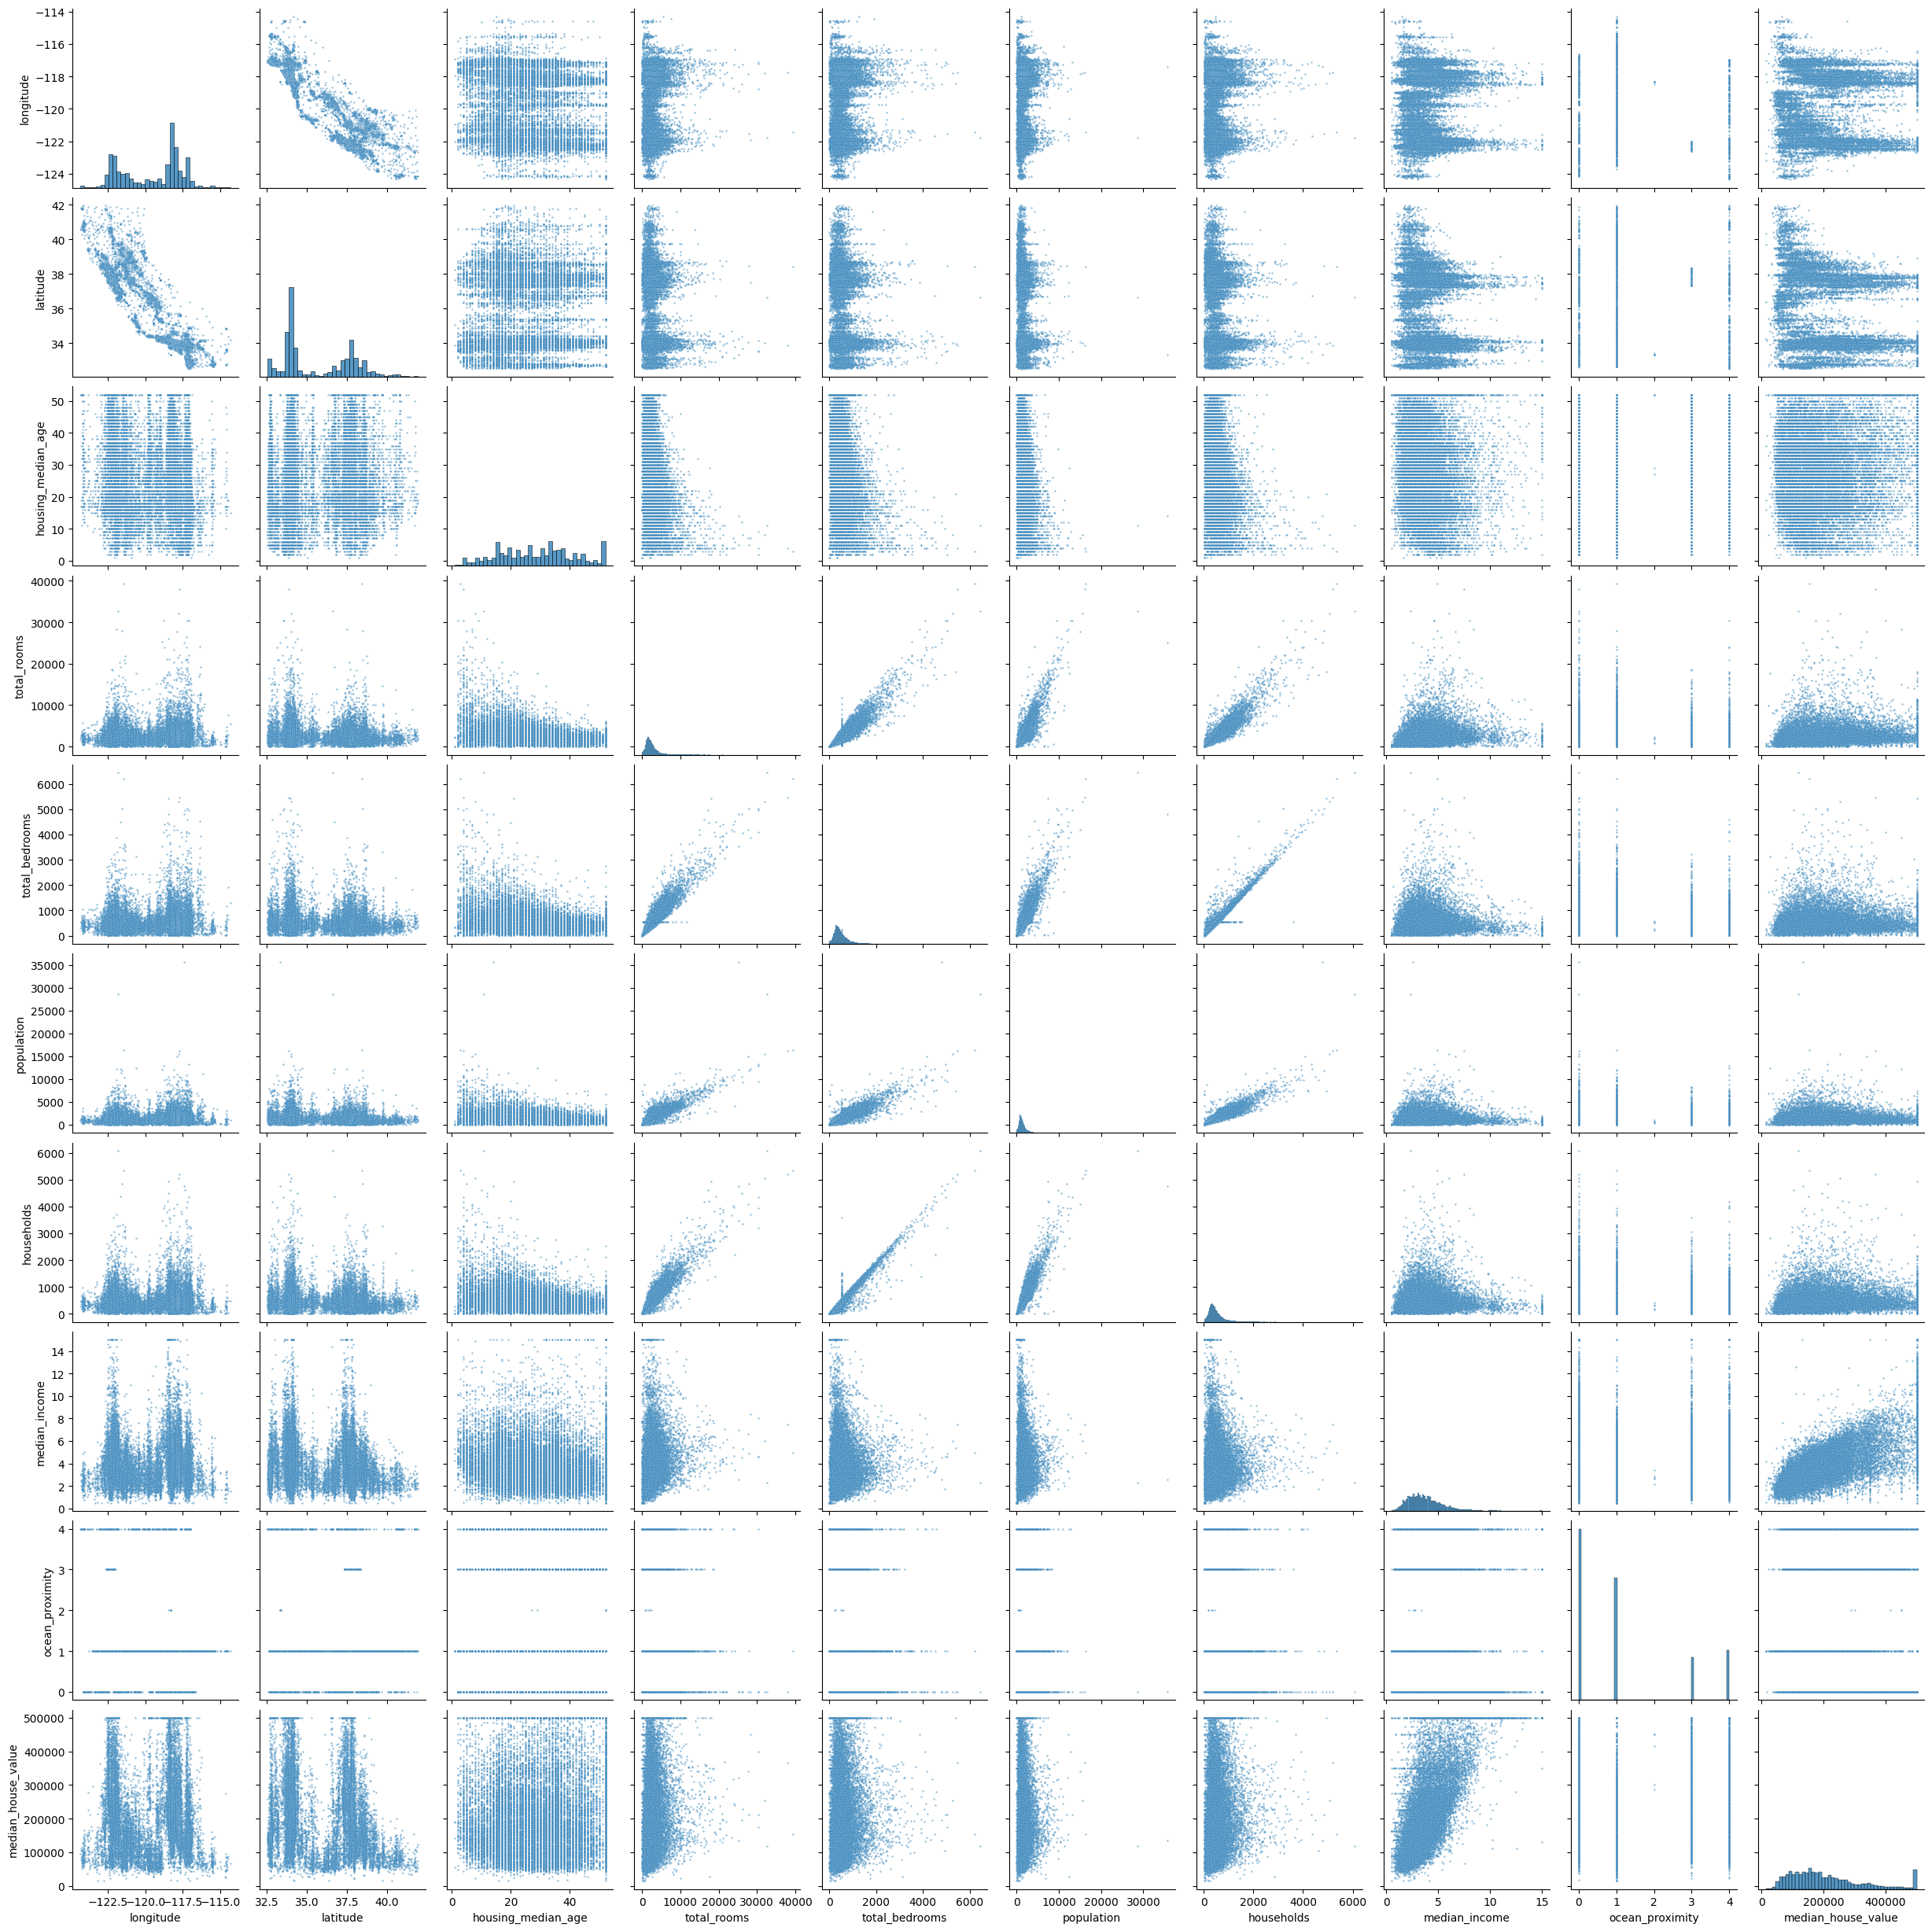

In [11]:
sns.pairplot(data=df, plot_kws={'s': 3, 'alpha': 0.5})

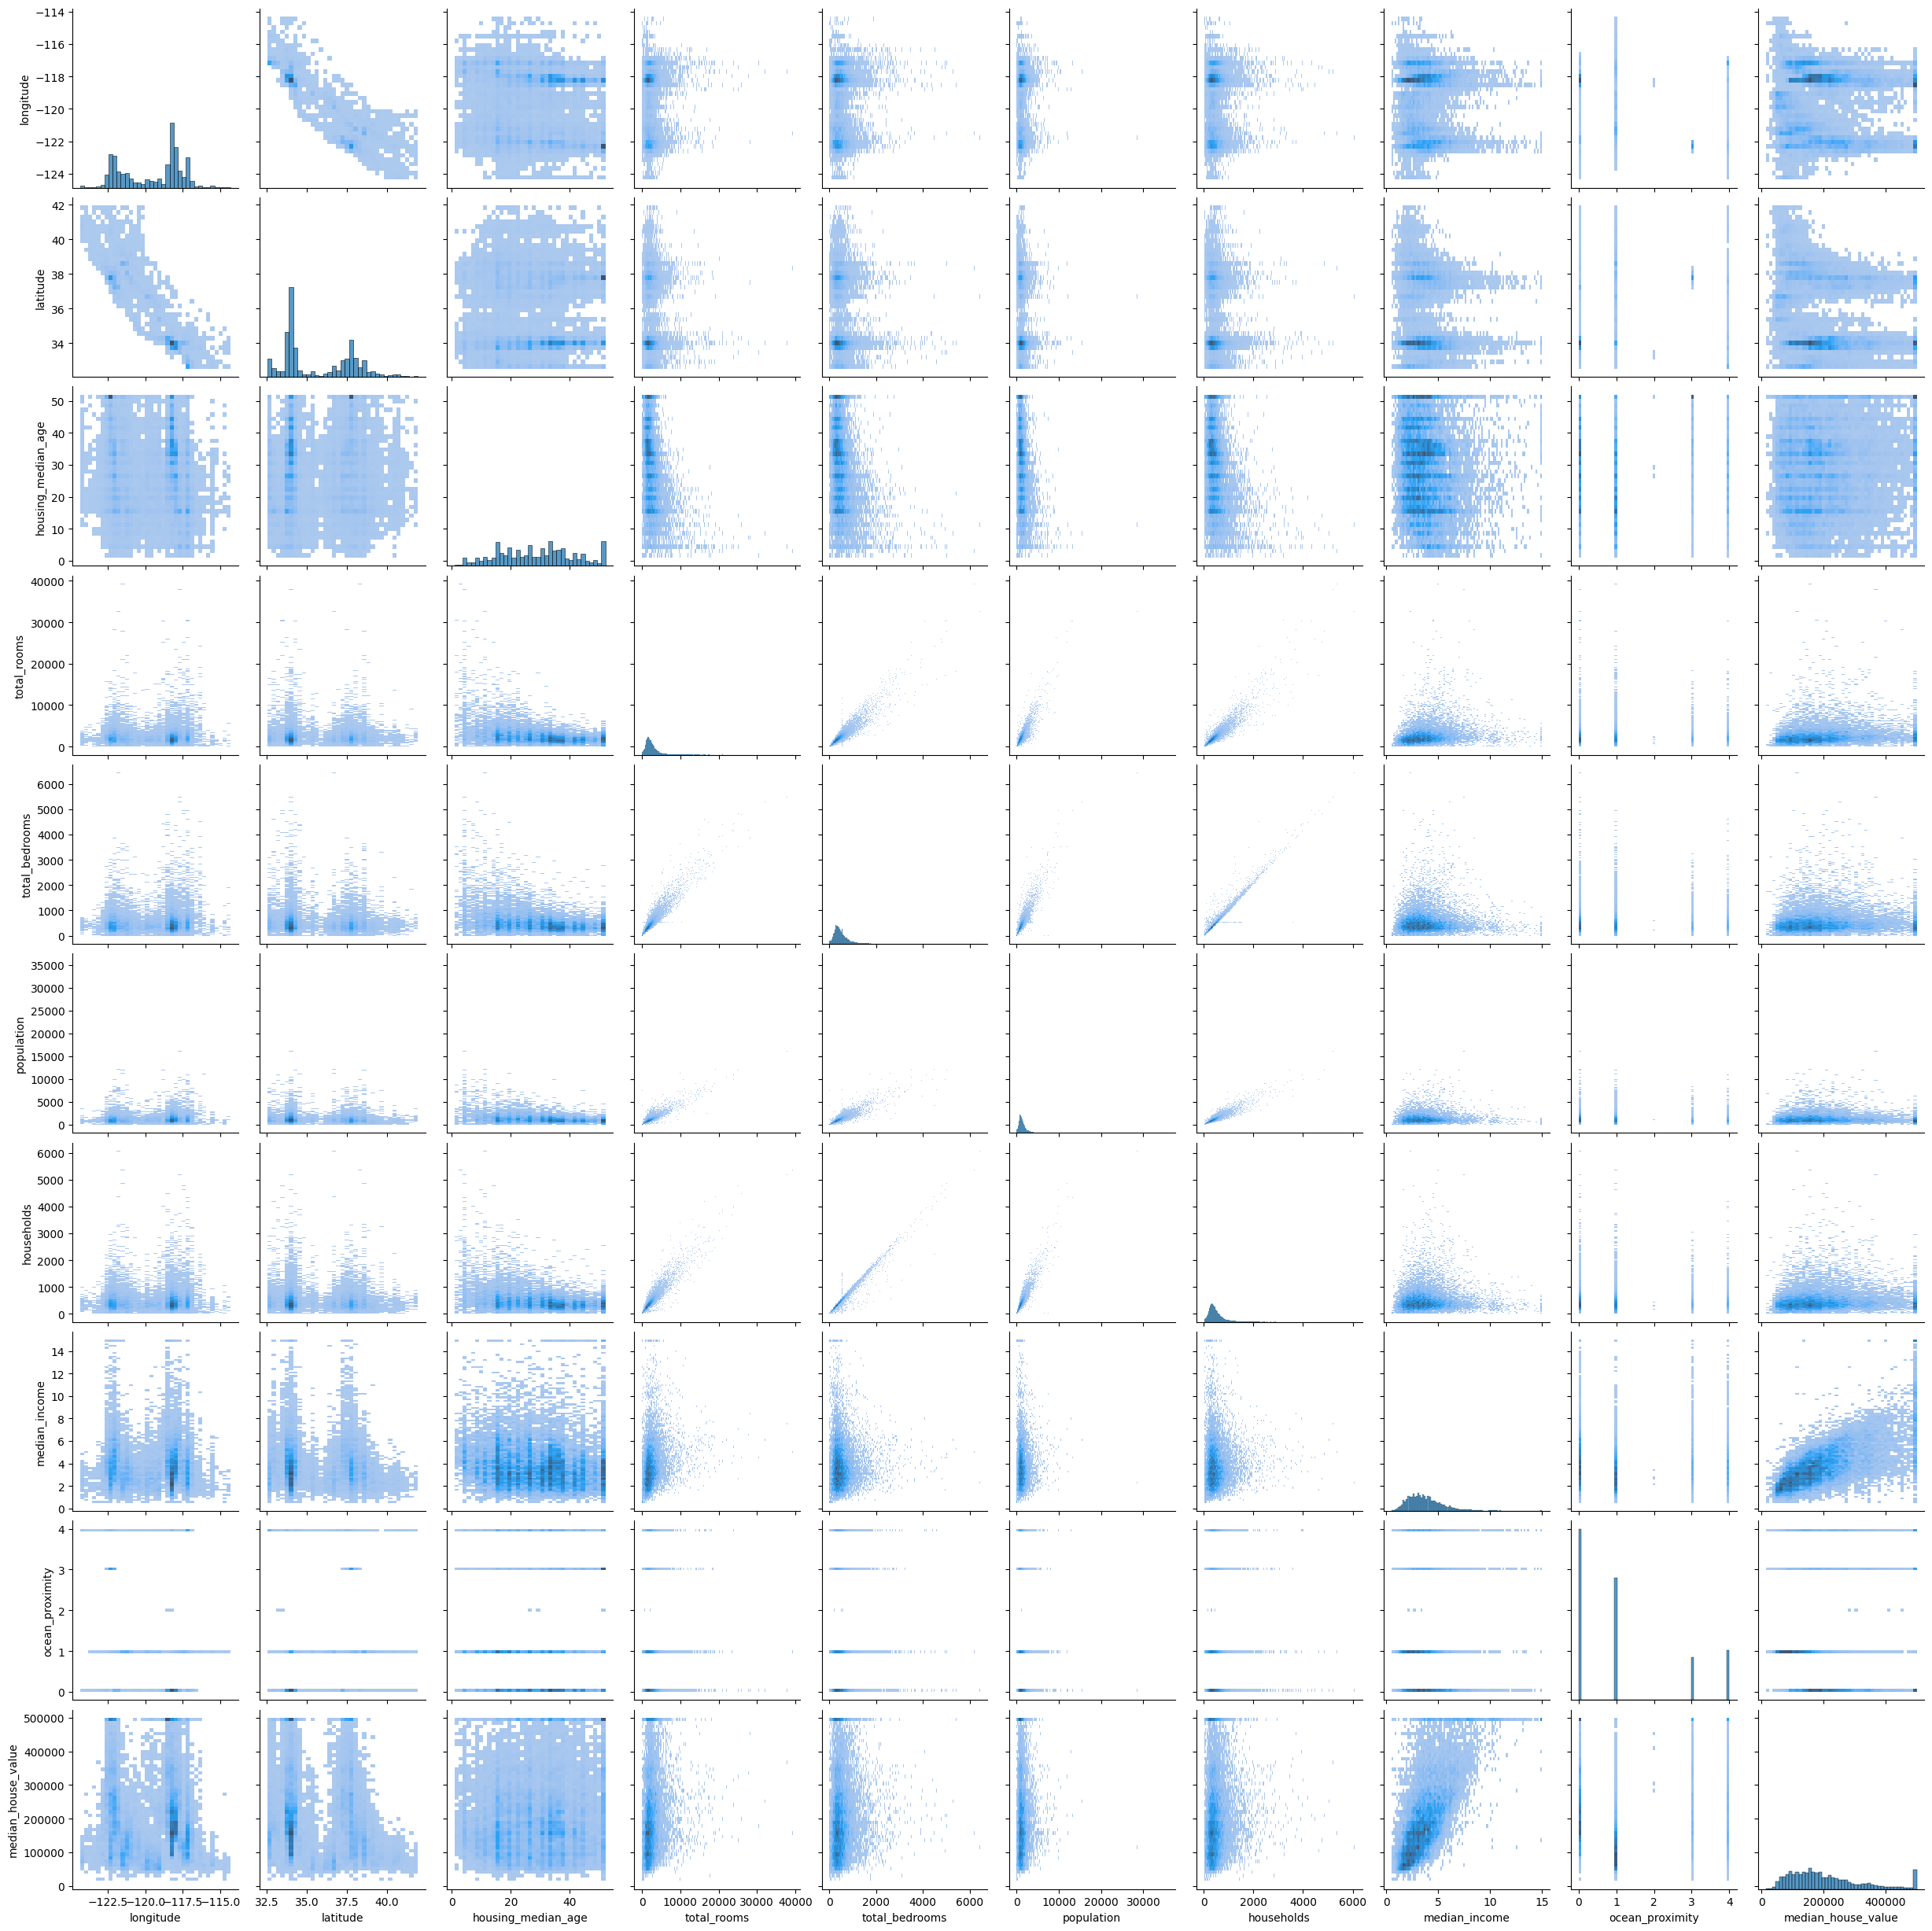

In [12]:
sns.pairplot(data=df, kind='hist')

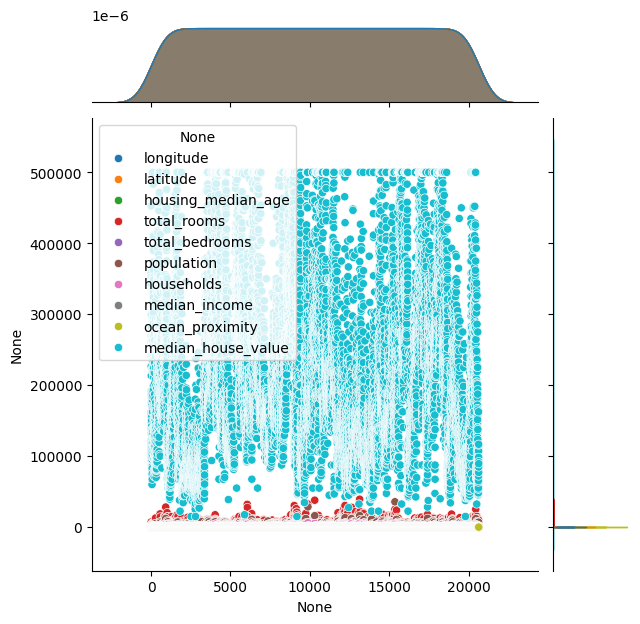

In [13]:
sns.jointplot(data=df)

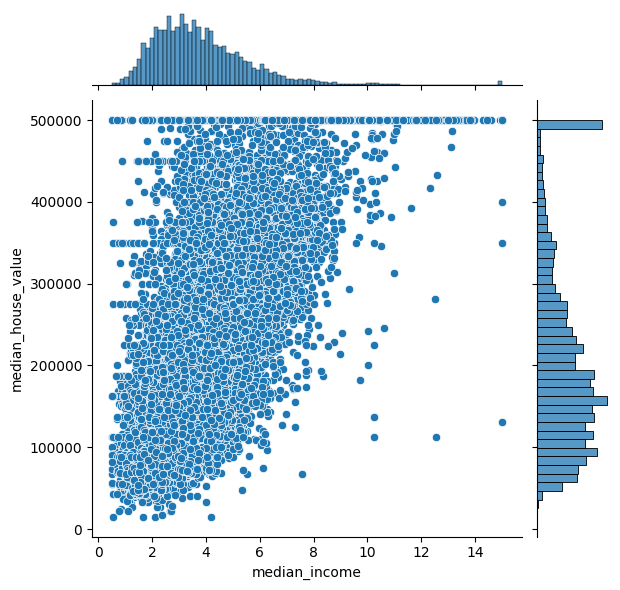

In [14]:
sns.jointplot(data=df, x="median_income", y="median_house_value")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'longitude'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'housing_median_age'),
  Text(0, 3.5, 'total_rooms'),
  Text(0, 4.5, 'total_bedrooms'),
  Text(0, 5.5, 'population'),
  Text(0, 6.5, 'households'),
  Text(0, 7.5, 'median_income'),
  Text(0, 8.5, 'ocean_proximity'),
  Text(0, 9.5, 'median_house_value')])

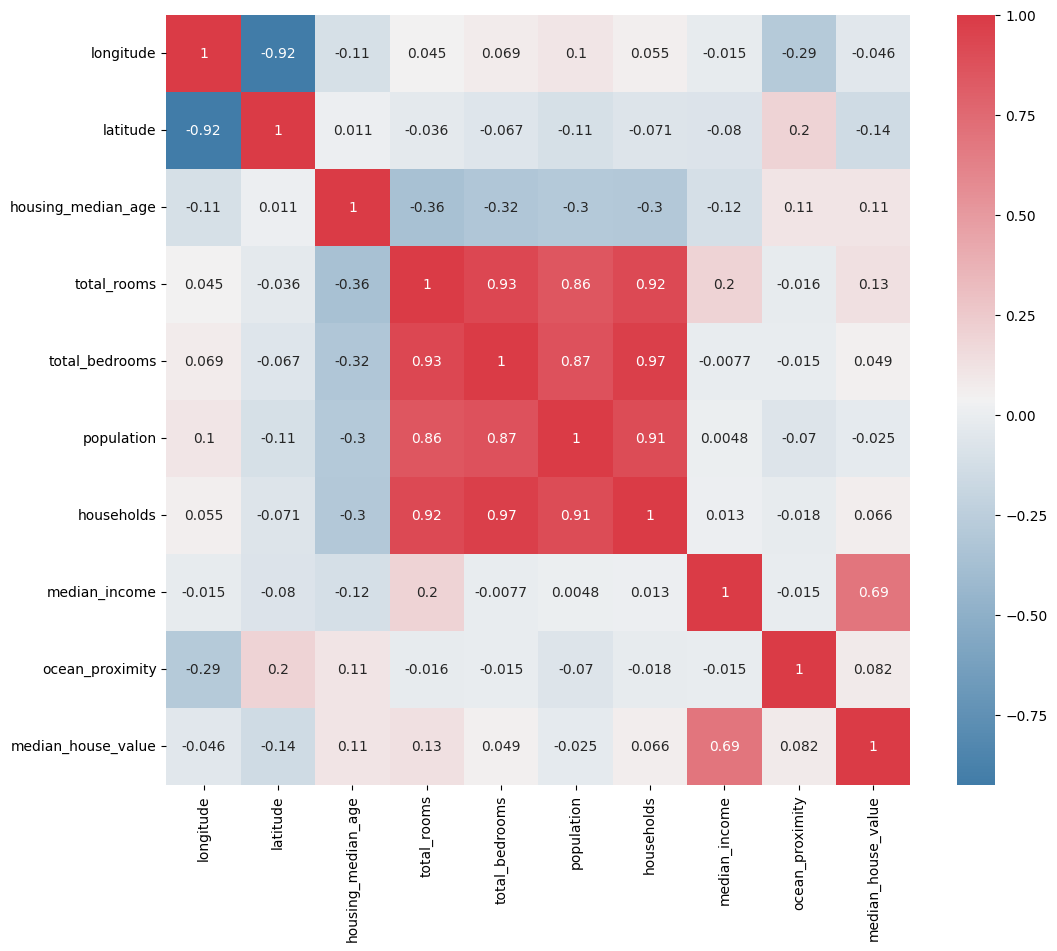

In [15]:
corr = df.corr(method='pearson')
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)
plt.yticks(rotation=0)

In [16]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

x = MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(x_test)

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
r2_lr = lr_model.score(x_test, y_test)
print(f"Linear Regression R² score: {r2_lr}")

Linear Regression MSE: 4954845142.614485
Linear Regression R² score: 0.6284132987955848


In [22]:
# Train a Ridge Regression model with Cross-Validation
ridge_model = RidgeCV(store_cv_values=True)
ridge_model.fit(x_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(x_test)

# Calculate MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Optimal alpha for Ridge: {ridge_model.alpha_}")
r2_ridge = ridge_model.score(x_test, y_test)
print(f"Ridge Regression R² score: {r2_ridge}")

Ridge Regression MSE: 4961091146.568225
Optimal alpha for Ridge: 0.1
Ridge Regression R² score: 0.6279448821371268


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [23]:
# Train a Lasso Regression model with Cross-Validation
lasso_model = LassoCV()
lasso_model.fit(x_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(x_test)

# Calculate MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Optimal alpha for Lasso: {lasso_model.alpha_}")
# Calculate R² score for Lasso Regression
r2_lasso = lasso_model.score(x_test, y_test)
print(f"Lasso Regression R² score: {r2_lasso}")

Lasso Regression MSE: 4962059582.176864
Optimal alpha for Lasso: 10.495336269626893
Lasso Regression R² score: 0.6278722546820228


In [28]:
# Train an ElasticNet model
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train, y_train)

# Predict on the test set
y_pred_en = elasticnet_model.predict(x_test)

# Calculate MSE
mse_en = mean_squared_error(y_test, y_pred_en)
print(f"ElasticNet Regression MSE: {mse_en}")
# Calculate R² score for ElasticNet Regression
r2_en = elasticnet_model.score(x_test, y_test)
print(f"ElasticNet Regression R² score: {r2_en}")

ElasticNet Regression MSE: 12810305467.737236
ElasticNet Regression R² score: 0.03929608026748188


In [27]:
# Train a Bayesian Ridge model
bayesian_model = BayesianRidge()
bayesian_model.fit(x_train, y_train)

# Predict on the test set
y_pred_bayesian = bayesian_model.predict(x_test)

# Calculate MSE
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
print(f"Bayesian Ridge Regression MSE: {mse_bayesian}")
# Calculate R² score for Bayesian Ridge Regression
r2_bayesian = bayesian_model.score(x_test, y_test)
print(f"Bayesian Ridge Regression R² score: {r2_bayesian}")

Bayesian Ridge Regression MSE: 4955732198.6870365
Bayesian Ridge Regression R² score: 0.6283467743674149


In [29]:
# Print all MSE values for comparison
print(f"Linear Regression MSE: {mse_lr}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"ElasticNet Regression MSE: {mse_en}")
print(f"Bayesian Ridge Regression MSE: {mse_bayesian}")

Linear Regression MSE: 4954845142.614485
Ridge Regression MSE: 4961091146.568225
Lasso Regression MSE: 4962059582.176864
ElasticNet Regression MSE: 12810305467.737236
Bayesian Ridge Regression MSE: 4955732198.6870365
